In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('pacific.csv/pacific.csv')
print(df)

             ID                 Name      Date  Time Event Status Latitude  \
0      EP011949              UNNAMED  19490611     0           TS    20.2N   
1      EP011949              UNNAMED  19490611   600           TS    20.2N   
2      EP011949              UNNAMED  19490611  1200           TS    20.2N   
3      EP011949              UNNAMED  19490611  1800           TS    20.3N   
4      EP011949              UNNAMED  19490612     0           TS    20.4N   
...         ...                  ...       ...   ...   ...    ...      ...   
26132  EP222015               SANDRA  20151128  1200           LO    21.7N   
26133  EP222015               SANDRA  20151128  1800           LO    22.4N   
26134  EP222015               SANDRA  20151129     0           LO    23.1N   
26135  EP222015               SANDRA  20151129   600           LO    23.5N   
26136  EP222015               SANDRA  20151129  1200           LO    24.2N   

      Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind 

In [14]:
df['Date'] = pd.to_datetime(df['Date'] , format= '%Y%m%d')

# I want to create columns Latitude Hemisphere and Longitude Hemisphere with code 0 = N , 1 = S & 0 = E , 1 = W.
def hemisphere(coord):
        hem = re.findall(r'[NSWE]' , coord)[0]
        if hem == 'N' or hem == 'E':
            return 0
        else:
            return 1

# Convert the latitude and longitude Column to numeric type.
df['Latitude'] =  df['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
df['Longitude'] =   df['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])


In [20]:
import re  # re to create column/class

In [21]:
# Creating the column Latitude_Hemisphere.    
df['Latitude_Hemisphere'] = df['Latitude'].apply(hemisphere)
df['Longitude_Hemisphere'] = df['Longitude'].apply(hemisphere)
df['Latitude_Hemisphere'] = df['Latitude_Hemisphere'].astype('category')
df['Longitude_Hemisphere'] = df['Longitude_Hemisphere'].astype('category')

In [22]:
print(df)

             ID                 Name      Date  Time Event Status Latitude  \
0      EP011949              UNNAMED  19490611     0           TS    20.2N   
1      EP011949              UNNAMED  19490611   600           TS    20.2N   
2      EP011949              UNNAMED  19490611  1200           TS    20.2N   
3      EP011949              UNNAMED  19490611  1800           TS    20.3N   
4      EP011949              UNNAMED  19490612     0           TS    20.4N   
...         ...                  ...       ...   ...   ...    ...      ...   
26132  EP222015               SANDRA  20151128  1200           LO    21.7N   
26133  EP222015               SANDRA  20151128  1800           LO    22.4N   
26134  EP222015               SANDRA  20151129     0           LO    23.1N   
26135  EP222015               SANDRA  20151129   600           LO    23.5N   
26136  EP222015               SANDRA  20151129  1200           LO    24.2N   

      Longitude  Maximum Wind  Minimum Pressure  ...  Moderate 

In [23]:
# The missing values are given by -999. So , we need to fill them appropriately.

# Show the count of missing values and fill them with mean.
for column in df.columns:
    missing_cnt = df[column][df[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
#         print('in ' , column)
        mean = round(df[column][df[column] != -999 ].mean())
#         print("mean",mean)
        index = df.loc[df[column] == -999 , column].index
#         print("index" , index )
        df.loc[df[column] == -999 , column] = mean
#         print(df.loc[index , column])

Missing Values in column ID =  0
Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Time =  0
Missing Values in column Event =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0
Missing Values in column Minimum Pressure =  0
Missing Values in column Low Wind NE =  0
Missing Values in column Low Wind SE =  0
Missing Values in column Low Wind SW =  0
Missing Values in column Low Wind NW =  0
Missing Values in column Moderate Wind NE =  0
Missing Values in column Moderate Wind SE =  0
Missing Values in column Moderate Wind SW =  0
Missing Values in column Moderate Wind NW =  0
Missing Values in column High Wind NE =  0
Missing Values in column High Wind SE =  0
Missing Values in column High Wind SW =  0
Missing Values in column High Wind NW =  0
Missing Values in column Latitude_Hemisphere =  0
Missing Values in column Longitude_Hemisph

In [24]:
print(df)

             ID                 Name      Date  Time Event Status Latitude  \
0      EP011949              UNNAMED  19490611     0           TS    20.2N   
1      EP011949              UNNAMED  19490611   600           TS    20.2N   
2      EP011949              UNNAMED  19490611  1200           TS    20.2N   
3      EP011949              UNNAMED  19490611  1800           TS    20.3N   
4      EP011949              UNNAMED  19490612     0           TS    20.4N   
...         ...                  ...       ...   ...   ...    ...      ...   
26132  EP222015               SANDRA  20151128  1200           LO    21.7N   
26133  EP222015               SANDRA  20151128  1800           LO    22.4N   
26134  EP222015               SANDRA  20151129     0           LO    23.1N   
26135  EP222015               SANDRA  20151129   600           LO    23.5N   
26136  EP222015               SANDRA  20151129  1200           LO    24.2N   

      Longitude  Maximum Wind  Minimum Pressure  ...  Moderate 

In [33]:
# Restructure the dataframe for visibility and remove columns ID and Event.        
df =  df[['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Latitude_Hemisphere' , 
       'Longitude', 'Longitude_Hemisphere' ,'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']]

# Change all time to format HHMM.
df['Time'] = df['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t
# Apply the function.
df['Time'] = df['Time'].apply(hhmm)

# Convert the column into Datetime.
df['Time'] = pd.to_datetime(df['Time'] , format="%H:%M:%S").dt.time  # changed time format


# Convert the status column to categorical.
df['Status'] = df['Status'].astype('category')

data = df.drop(columns = ['ID' , 'Event'])

In [34]:
# Display the data.
data.head(10)

,Name,Date,Time,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,UNNAMED,19490611,00:00:00,TS,20.2N,0,106.3W,1,45,995,...,27,35,13,11,9,11,5,4,3,5
1,UNNAMED,19490611,06:00:00,TS,20.2N,0,106.4W,1,45,995,...,27,35,13,11,9,11,5,4,3,5
2,UNNAMED,19490611,12:00:00,TS,20.2N,0,106.7W,1,45,995,...,27,35,13,11,9,11,5,4,3,5
3,UNNAMED,19490611,18:00:00,TS,20.3N,0,107.7W,1,45,995,...,27,35,13,11,9,11,5,4,3,5
4,UNNAMED,19490612,00:00:00,TS,20.4N,0,108.6W,1,45,995,...,27,35,13,11,9,11,5,4,3,5
5,UNNAMED,19490612,06:00:00,TS,20.5N,0,109.4W,1,45,995,...,27,35,13,11,9,11,5,4,3,5
6,UNNAMED,19490612,12:00:00,TS,20.6N,0,110.2W,1,45,995,...,27,35,13,11,9,11,5,4,3,5
7,UNNAMED,19490617,12:00:00,TS,14.1N,0,107.0W,1,45,995,...,27,35,13,11,9,11,5,4,3,5
8,UNNAMED,19490617,18:00:00,TS,14.6N,0,107.7W,1,45,995,...,27,35,13,11,9,11,5,4,3,5
9,UNNAMED,19490618,00:00:00,TS,15.0N,0,108.4W,1,45,995,...,27,35,13,11,9,11,5,4,3,5


In [36]:
# Step 2: Data Preprocessing
from sklearn.model_selection import train_test_split

# Select relevant columns for training and testing (features and target)
# Here we assume 'Maximum Wind' as the target variable to predict, and the rest as features.
features = data[['Latitude', 'Longitude', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW']]
target = data['Maximum Wind']

# # Convert latitude and longitude to numeric (strip 'N', 'S', 'E', 'W' and convert to float)
# features['Latitude'] = features['Latitude'].str.replace(r'[^\d.]', '', regex=True).astype(float)
# features['Longitude'] = features['Longitude'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Use .loc to ensure proper assignment
features.loc[:, 'Latitude'] = features['Latitude'].str.replace(r'[^\d.]', '', regex=True).astype(float)
features.loc[:, 'Longitude'] = features['Longitude'].str.replace(r'[^\d.]', '', regex=True).astype(float)


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((20909, 7), (5228, 7)), ((20909,), (5228,)))

In [41]:
# Import Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

# Import train-test split.
from sklearn.model_selection import train_test_split

# Import accuracy Score.
from sklearn.metrics import accuracy_score

#Import Recall Score.
from sklearn.metrics import recall_score 

#Import Precision Score.
from sklearn.metrics import precision_score 

# Form the model.
dt = DecisionTreeClassifier(min_samples_leaf=50 , criterion='entropy')


# # Set the dependent and independent variables.
# x_train = data[['Latitude', 'Latitude_Hemisphere',
#        'Longitude', 'Longitude_Hemisphere', 'Maximum Wind', 'Minimum Pressure',
#        'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
#        'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW',
#        'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW',
#        'High Wind NW' , 'Month' , 'Year']]
# y_train = data['Status']


# Perform the Kfold validation.

# Import the KFold library.
from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )

dt_scores = []
dt_recall_scores = []
dt_precision_scores = []
for tr , ts in kf.split(X_train):
    xtr = X_train.loc[tr]
    ytr = y_train.loc[tr]
    xts = X_train.loc[ts]
    yts = y_train.loc[ts]
    dt.fit(xtr , ytr)
    y_pred = dt.predict(xts) 
    dt_scores.append(accuracy_score(yts, y_pred)) 
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted'))
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted'))
# dt.fit(x_train, y_train)
# y_pred = dt.predict(x_test)
# accuracy_score(y_test, y_pred)
dt_scr = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('Accuracy score for Decision Tree is :' , dt_scr['accuracy'])
print('Recall score for Decision Tree is :' , dt_scr['recall'])
print('Precision score for Decision Tree is :' , dt_scr['precision'])

KeyError: '[6, 17, 29, 30, 35, 46, 52, 57, 69, 75, 83, 91, 99, 101, 103, 121, 134, 146, 147, 150, 167, 168, 175, 194, 196, 199, 217, 222, 230, 243, 250, 257, 259, 263, 274, 278, 280, 283, 291, 311, 312, 315, 334, 345, 349, 353, 359, 367, 369, 373, 380, 382, 397, 401, 411, 428, 457, 469, 478, 485, 487, 491, 501, 509, 512, 513, 516, 531, 536, 547, 550, 554, 575, 585, 601, 604, 616, 624, 626, 635, 638, 668, 674, 681, 683, 701, 708, 725, 729, 733, 734, 735, 741, 742, 748, 752, 766, 775, 809, 819, 820, 829, 833, 844, 852, 873, 875, 880, 884, 896, 900, 902, 905, 907, 913, 943, 945, 953, 959, 963, 964, 970, 984, 996, 1009, 1012, 1023, 1026, 1035, 1045, 1065, 1075, 1103, 1106, 1108, 1113, 1121, 1122, 1131, 1174, 1175, 1190, 1192, 1197, 1206, 1224, 1231, 1232, 1243, 1246, 1247, 1255, 1256, 1259, 1274, 1276, 1280, 1298, 1303, 1318, 1336, 1339, 1347, 1349, 1356, 1365, 1366, 1383, 1405, 1411, 1412, 1413, 1418, 1422, 1423, 1429, 1441, 1448, 1483, 1498, 1514, 1557, 1569, 1574, 1584, 1588, 1595, 1598, 1603, 1610, 1631, 1644, 1661, 1662, 1664, 1668, 1675, 1680, 1684, 1687, 1698, 1704, 1738, 1743, 1751, 1765, 1775, 1791, 1804, 1808, 1812, 1818, 1822, 1834, 1847, 1859, 1873, 1880, 1888, 1889, 1891, 1915, 1921, 1923, 1926, 1940, 1944, 1947, 1959, 1966, 1972, 2001, 2004, 2009, 2012, 2034, 2051, 2055, 2061, 2074, 2075, 2081, 2085, 2095, 2101, 2111, 2136, 2152, 2157, 2165, 2166, 2168, 2173, 2188, 2194, 2201, 2208, 2209, 2213, 2220, 2221, 2222, 2225, 2227, 2229, 2232, 2240, 2245, 2252, 2254, 2264, 2265, 2270, 2275, 2281, 2290, 2299, 2300, 2332, 2334, 2342, 2346, 2350, 2359, 2362, 2374, 2375, 2380, 2404, 2425, 2434, 2435, 2441, 2442, 2447, 2449, 2463, 2464, 2467, 2476, 2492, 2496, 2497, 2508, 2512, 2518, 2527, 2528, 2540, 2541, 2545, 2549, 2561, 2564, 2587, 2588, 2592, 2595, 2604, 2608, 2619, 2635, 2645, 2662, 2681, 2683, 2697, 2704, 2707, 2714, 2715, 2726, 2727, 2730, 2733, 2734, 2740, 2744, 2748, 2752, 2760, 2762, 2764, 2767, 2772, 2782, 2784, 2790, 2805, 2806, 2813, 2814, 2819, 2825, 2830, 2838, 2842, 2851, 2858, 2870, 2873, 2874, 2884, 2897, 2904, 2905, 2907, 2916, 2923, 2932, 2937, 2947, 2973, 2974, 2981, 2982, 3002, 3014, 3019, 3027, 3047, 3053, 3058, 3059, 3064, 3068, 3073, 3077, 3096, 3108, 3110, 3147, 3165, 3169, 3172, 3181, 3184, 3197, 3210, 3211, 3213, 3219, 3223, 3229, 3246, 3254, 3256, 3268, 3272, 3286, 3287, 3288, 3296, 3298, 3302, 3308, 3314, 3316, 3318, 3328, 3329, 3341, 3350, 3362, 3369, 3381, 3382, 3383, 3387, 3394, 3398, 3399, 3402, 3410, 3418, 3421, 3422, 3426, 3433, 3441, 3448, 3451, 3470, 3482, 3486, 3492, 3494, 3501, 3503, 3508, 3509, 3522, 3533, 3537, 3541, 3547, 3548, 3566, 3571, 3580, 3581, 3585, 3589, 3592, 3594, 3595, 3601, 3617, 3634, 3639, 3658, 3662, 3673, 3686, 3690, 3694, 3698, 3699, 3702, 3703, 3704, 3706, 3710, 3711, 3732, 3734, 3735, 3737, 3739, 3740, 3745, 3753, 3757, 3780, 3784, 3789, 3792, 3794, 3798, 3799, 3806, 3813, 3821, 3834, 3840, 3843, 3844, 3848, 3860, 3874, 3876, 3877, 3884, 3901, 3921, 3923, 3930, 3931, 3942, 3946, 3949, 3953, 3958, 3960, 3971, 3974, 3984, 3988, 3993, 3995, 4003, 4026, 4031, 4032, 4036, 4047, 4068, 4070, 4085, 4093, 4097, 4099, 4101, 4104, 4106, 4119, 4125, 4148, 4152, 4156, 4157, 4168, 4170, 4186, 4189, 4194, 4201, 4203, 4206, 4211, 4219, 4220, 4226, 4229, 4235, 4245, 4246, 4254, 4256, 4265, 4273, 4275, 4285, 4286, 4291, 4293, 4303, 4305, 4306, 4322, 4336, 4343, 4347, 4372, 4384, 4387, 4397, 4400, 4404, 4405, 4416, 4418, 4421, 4424, 4438, 4442, 4448, 4455, 4461, 4469, 4471, 4479, 4484, 4489, 4490, 4501, 4510, 4528, 4534, 4540, 4546, 4550, 4563, 4564, 4568, 4569, 4579, 4580, 4596, 4605, 4610, 4618, 4639, 4645, 4659, 4679, 4685, 4688, 4689, 4699, 4704, 4705, 4715, 4720, 4724, 4730, 4738, 4740, 4745, 4749, 4771, 4772, 4774, 4783, 4785, 4793, 4794, 4810, 4813, 4814, 4832, 4834, 4843, 4844, 4851, 4859, 4871, 4877, 4894, 4900, 4903, 4932, 4936, 4950, 4957, 4966, 4972, 4978, 4982, 4984, 4985, 4990, 5006, 5013, 5038, 5042, 5048, 5050, 5053, 5061, 5068, 5070, 5071, 5076, 5094, 5096, 5098, 5099, 5100, 5102, 5107, 5114, 5115, 5116, 5117, 5121, 5130, 5155, 5160, 5163, 5165, 5187, 5191, 5198, 5210, 5214, 5218, 5219, 5221, 5225, 5227, 5245, 5252, 5259, 5260, 5262, 5284, 5290, 5325, 5331, 5339, 5343, 5345, 5354, 5357, 5359, 5365, 5377, 5382, 5384, 5393, 5394, 5453, 5460, 5464, 5466, 5483, 5496, 5500, 5501, 5503, 5504, 5505, 5508, 5511, 5513, 5516, 5523, 5532, 5533, 5535, 5550, 5551, 5553, 5554, 5561, 5572, 5584, 5589, 5610, 5621, 5625, 5638, 5640, 5647, 5652, 5653, 5657, 5663, 5673, 5676, 5687, 5705, 5706, 5708, 5711, 5719, 5720, 5742, 5749, 5771, 5780, 5784, 5799, 5802, 5804, 5815, 5816, 5836, 5843, 5844, 5853, 5857, 5859, 5875, 5908, 5910, 5925, 5940, 5963, 5975, 5979, 5980, 5982, 5998, 6011, 6014, 6029, 6069, 6072, 6077, 6084, 6087, 6091, 6095, 6108, 6111, 6119, 6128, 6136, 6137, 6138, 6148, 6161, 6165, 6179, 6188, 6195, 6202, 6206, 6214, 6215, 6216, 6223, 6228, 6232, 6234, 6244, 6245, 6248, 6253, 6267, 6270, 6285, 6287, 6289, 6290, 6300, 6307, 6316, 6332, 6346, 6350, 6362, 6366, 6384, 6388, 6390, 6392, 6400, 6404, 6417, 6419, 6421, 6424, 6425, 6433, 6440, 6442, 6453, 6455, 6460, 6462, 6463, 6480, 6484, 6491, 6492, 6498, 6501, 6503, 6508, 6510, 6517, 6522, 6524, 6527, 6528, 6529, 6536, 6545, 6550, 6552, 6562, 6576, 6580, 6592, 6595, 6602, 6604, 6612, 6620, 6624, 6625, 6633, 6646, 6649, 6657, 6664, 6672, 6674, 6677, 6685, 6692, 6700, 6714, 6717, 6720, 6726, 6741, 6750, 6753, 6757, 6769, 6770, 6778, 6779, 6798, 6802, 6803, 6808, 6814, 6826, 6830, 6836, 6865, 6870, 6871, 6872, 6874, 6876, 6883, 6887, 6896, 6902, 6904, 6906, 6909, 6912, 6913, 6914, 6916, 6920, 6930, 6933, 6934, 6944, 6946, 6948, 6950, 6964, 6965, 6974, 6977, 6983, 7001, 7003, 7012, 7024, 7029, 7030, 7033, 7046, 7049, 7070, 7071, 7072, 7085, 7088, 7090, 7094, 7100, 7104, 7112, 7113, 7117, 7125, 7131, 7138, 7152, 7168, 7172, 7174, 7178, 7185, 7198, 7209, 7216, 7217, 7231, 7241, 7249, 7251, 7256, 7258, 7290, 7293, 7294, 7298, 7302, 7304, 7305, 7317, 7325, 7330, 7339, 7348, 7356, 7363, 7369, 7376, 7417, 7428, 7431, 7439, 7447, 7451, 7467, 7468, 7477, 7482, 7495, 7499, 7500, 7502, 7503, 7525, 7536, 7539, 7563, 7567, 7571, 7573, 7578, 7581, 7584, 7585, 7586, 7589, 7591, 7602, 7603, 7627, 7646, 7647, 7653, 7655, 7658, 7668, 7676, 7682, 7685, 7691, 7698, 7703, 7706, 7708, 7713, 7721, 7722, 7724, 7729, 7738, 7739, 7747, 7751, 7763, 7768, 7782, 7785, 7793, 7801, 7806, 7808, 7809, 7811, 7819, 7826, 7834, 7839, 7840, 7841, 7880, 7884, 7885, 7886, 7889, 7891, 7893, 7898, 7901, 7907, 7916, 7917, 7918, 7923, 7924, 7930, 7936, 7955, 7964, 7969, 7985, 7998, 8013, 8018, 8019, 8020, 8021, 8028, 8037, 8048, 8057, 8069, 8074, 8082, 8087, 8094, 8099, 8105, 8113, 8119, 8127, 8132, 8136, 8139, 8141, 8146, 8151, 8156, 8157, 8158, 8164, 8165, 8178, 8192, 8195, 8200, 8203, 8206, 8211, 8214, 8233, 8238, 8240, 8242, 8247, 8268, 8270, 8274, 8278, 8280, 8282, 8285, 8290, 8293, 8295, 8300, 8310, 8316, 8318, 8319, 8331, 8337, 8341, 8344, 8345, 8349, 8351, 8355, 8361, 8362, 8365, 8375, 8390, 8394, 8396, 8403, 8407, 8410, 8413, 8441, 8443, 8447, 8449, 8450, 8451, 8453, 8454, 8459, 8465, 8466, 8474, 8478, 8480, 8487, 8489, 8492, 8504, 8505, 8510, 8516, 8518, 8525, 8540, 8542, 8544, 8557, 8570, 8589, 8602, 8617, 8622, 8623, 8628, 8629, 8639, 8641, 8642, 8643, 8648, 8658, 8663, 8665, 8670, 8672, 8673, 8688, 8692, 8696, 8710, 8714, 8725, 8729, 8739, 8757, 8764, 8765, 8768, 8777, 8796, 8797, 8810, 8813, 8815, 8832, 8842, 8856, 8873, 8878, 8880, 8882, 8886, 8887, 8889, 8892, 8896, 8897, 8898, 8899, 8902, 8908, 8919, 8922, 8925, 8928, 8929, 8932, 8937, 8939, 8941, 8944, 8956, 8957, 8958, 8960, 8965, 8969, 8971, 8977, 8979, 8993, 9000, 9002, 9006, 9010, 9012, 9020, 9022, 9026, 9033, 9037, 9038, 9043, 9048, 9050, 9056, 9061, 9068, 9069, 9070, 9084, 9092, 9098, 9112, 9115, 9128, 9129, 9132, 9134, 9140, 9161, 9169, 9172, 9183, 9198, 9199, 9201, 9212, 9222, 9226, 9237, 9246, 9250, 9251, 9252, 9253, 9264, 9266, 9284, 9287, 9289, 9291, 9296, 9300, 9315, 9322, 9338, 9345, 9349, 9350, 9355, 9358, 9367, 9375, 9391, 9405, 9407, 9409, 9410, 9423, 9426, 9434, 9440, 9441, 9453, 9478, 9480, 9489, 9495, 9502, 9504, 9509, 9512, 9515, 9526, 9529, 9530, 9532, 9534, 9538, 9542, 9558, 9575, 9579, 9585, 9594, 9595, 9602, 9607, 9614, 9622, 9623, 9625, 9629, 9636, 9644, 9648, 9651, 9658, 9659, 9668, 9682, 9688, 9701, 9710, 9733, 9740, 9742, 9747, 9753, 9755, 9758, 9792, 9796, 9807, 9812, 9816, 9818, 9820, 9826, 9831, 9838, 9853, 9871, 9872, 9886, 9888, 9892, 9893, 9898, 9904, 9909, 9918, 9920, 9922, 9932, 9936, 9942, 9946, 9948, 9958, 9977, 9986, 9995, 9997, 9999, 10004, 10008, 10011, 10018, 10019, 10023, 10034, 10039, 10041, 10042, 10052, 10054, 10056, 10062, 10076, 10087, 10090, 10091, 10104, 10114, 10119, 10120, 10130, 10134, 10152, 10154, 10157, 10158, 10163, 10168, 10175, 10182, 10185, 10186, 10191, 10193, 10203, 10206, 10210, 10212, 10217, 10221, 10226, 10228, 10229, 10231, 10235, 10241, 10242, 10243, 10244, 10254, 10260, 10274, 10275, 10277, 10280, 10296, 10297, 10300, 10311, 10312, 10329, 10331, 10333, 10342, 10352, 10353, 10354, 10356, 10359, 10362, 10372, 10389, 10392, 10398, 10408, 10421, 10427, 10431, 10432, 10438, 10439, 10445, 10448, 10459, 10461, 10465, 10467, 10468, 10475, 10477, 10480, 10483, 10495, 10498, 10500, 10501, 10506, 10513, 10519, 10533, 10544, 10545, 10557, 10573, 10574, 10577, 10581, 10598, 10605, 10607, 10610, 10633, 10643, 10650, 10663, 10664, 10673, 10676, 10697, 10708, 10714, 10721, 10731, 10733, 10735, 10739, 10743, 10746, 10747, 10755, 10772, 10779, 10781, 10798, 10801, 10803, 10804, 10814, 10826, 10829, 10834, 10840, 10841, 10842, 10852, 10854, 10863, 10869, 10870, 10881, 10890, 10898, 10902, 10904, 10908, 10909, 10923, 10941, 10943, 10948, 10950, 10952, 10959, 10961, 10971, 10978, 10981, 10982, 10984, 10991, 10993, 11007, 11012, 11021, 11026, 11031, 11040, 11044, 11072, 11106, 11117, 11123, 11129, 11131, 11132, 11146, 11149, 11163, 11176, 11178, 11188, 11189, 11203, 11222, 11223, 11227, 11230, 11233, 11235, 11242, 11243, 11253, 11255, 11262, 11265, 11266, 11272, 11274, 11290, 11291, 11307, 11309, 11311, 11313, 11316, 11327, 11333, 11337, 11352, 11361, 11365, 11373, 11374, 11378, 11386, 11387, 11388, 11395, 11399, 11401, 11403, 11416, 11418, 11420, 11444, 11449, 11451, 11458, 11462, 11466, 11474, 11481, 11487, 11490, 11495, 11505, 11507, 11509, 11511, 11521, 11524, 11527, 11537, 11541, 11551, 11566, 11579, 11581, 11582, 11583, 11592, 11605, 11610, 11611, 11621, 11624, 11628, 11633, 11654, 11658, 11660, 11674, 11677, 11681, 11693, 11715, 11719, 11724, 11732, 11734, 11743, 11747, 11751, 11752, 11753, 11762, 11764, 11765, 11766, 11770, 11775, 11778, 11782, 11783, 11790, 11791, 11793, 11794, 11798, 11800, 11809, 11813, 11828, 11832, 11833, 11839, 11841, 11844, 11845, 11850, 11853, 11854, 11863, 11866, 11869, 11887, 11888, 11895, 11896, 11897, 11899, 11913, 11917, 11923, 11925, 11931, 11952, 11955, 11960, 11961, 11965, 11973, 11974, 11988, 11993, 11995, 11997, 12016, 12017, 12025, 12034, 12036, 12050, 12051, 12053, 12064, 12065, 12069, 12074, 12079, 12085, 12090, 12093, 12095, 12097, 12099, 12117, 12133, 12136, 12138, 12140, 12146, 12148, 12152, 12154, 12157, 12160, 12169, 12179, 12188, 12193, 12202, 12214, 12215, 12218, 12244, 12248, 12255, 12261, 12263, 12279, 12282, 12283, 12285, 12290, 12291, 12293, 12315, 12326, 12340, 12341, 12344, 12347, 12348, 12350, 12351, 12353, 12359, 12364, 12368, 12369, 12372, 12375, 12387, 12393, 12395, 12401, 12402, 12406, 12408, 12409, 12416, 12417, 12422, 12425, 12430, 12434, 12451, 12457, 12463, 12471, 12491, 12492, 12493, 12503, 12524, 12528, 12530, 12543, 12547, 12556, 12559, 12562, 12571, 12574, 12575, 12591, 12608, 12613, 12618, 12620, 12622, 12623, 12624, 12628, 12636, 12639, 12642, 12644, 12645, 12650, 12656, 12657, 12659, 12681, 12687, 12689, 12691, 12692, 12701, 12710, 12711, 12717, 12727, 12745, 12750, 12753, 12756, 12758, 12766, 12781, 12784, 12785, 12787, 12793, 12798, 12800, 12805, 12806, 12813, 12814, 12815, 12821, 12830, 12832, 12836, 12838, 12840, 12842, 12848, 12849, 12850, 12859, 12863, 12872, 12887, 12890, 12892, 12896, 12904, 12907, 12912, 12914, 12957, 12959, 12967, 12969, 12971, 12976, 12981, 12988, 13010, 13014, 13019, 13023, 13028, 13054, 13059, 13061, 13062, 13066, 13075, 13086, 13093, 13096, 13103, 13110, 13114, 13118, 13119, 13120, 13126, 13129, 13130, 13141, 13160, 13162, 13169, 13174, 13181, 13182, 13185, 13188, 13202, 13206, 13212, 13222, 13227, 13235, 13244, 13250, 13260, 13270, 13274, 13282, 13297, 13298, 13310, 13312, 13314, 13315, 13321, 13328, 13332, 13344, 13347, 13349, 13366, 13373, 13384, 13387, 13394, 13396, 13408, 13412, 13415, 13423, 13424, 13432, 13433, 13443, 13466, 13474, 13475, 13480, 13483, 13494, 13495, 13504, 13508, 13512, 13522, 13524, 13526, 13529, 13530, 13536, 13549, 13553, 13572, 13578, 13583, 13595, 13597, 13604, 13613, 13614, 13616, 13624, 13630, 13638, 13651, 13655, 13676, 13677, 13681, 13690, 13691, 13693, 13706, 13724, 13725, 13734, 13736, 13738, 13740, 13759, 13761, 13764, 13766, 13770, 13771, 13786, 13787, 13797, 13804, 13812, 13814, 13815, 13816, 13820, 13855, 13857, 13872, 13875, 13876, 13881, 13899, 13904, 13905, 13909, 13914, 13916, 13924, 13927, 13933, 13938, 13950, 13953, 13985, 13989, 14000, 14001, 14002, 14004, 14008, 14012, 14013, 14018, 14019, 14020, 14041, 14045, 14047, 14053, 14054, 14055, 14058, 14063, 14064, 14070, 14073, 14077, 14084, 14088, 14091, 14095, 14096, 14107, 14108, 14118, 14144, 14145, 14146, 14148, 14149, 14151, 14159, 14160, 14171, 14177, 14180, 14183, 14186, 14190, 14192, 14206, 14214, 14216, 14219, 14222, 14225, 14233, 14237, 14239, 14240, 14244, 14258, 14263, 14268, 14273, 14275, 14278, 14281, 14283, 14293, 14297, 14303, 14322, 14323, 14326, 14329, 14332, 14339, 14353, 14355, 14361, 14362, 14366, 14368, 14383, 14395, 14396, 14399, 14400, 14401, 14402, 14405, 14406, 14417, 14442, 14458, 14461, 14467, 14480, 14499, 14503, 14504, 14508, 14524, 14532, 14533, 14544, 14548, 14558, 14563, 14570, 14577, 14578, 14590, 14592, 14600, 14602, 14608, 14614, 14617, 14619, 14624, 14632, 14637, 14644, 14653, 14658, 14659, 14662, 14668, 14669, 14672, 14673, 14675, 14695, 14703, 14720, 14726, 14727, 14729, 14733, 14737, 14739, 14747, 14748, 14751, 14753, 14754, 14757, 14759, 14760, 14768, 14775, 14790, 14795, 14802, 14807, 14808, 14812, 14815, 14819, 14822, 14829, 14832, 14844, 14856, 14857, 14858, 14860, 14861, 14880, 14881, 14897, 14907, 14913, 14919, 14920, 14931, 14932, 14934, 14941, 14957, 14965, 14969, 14970, 14975, 14979, 14980, 14982, 14983, 14985, 14987, 14990, 14992, 15000, 15002, 15003, 15013, 15019, 15025, 15027, 15031, 15044, 15053, 15054, 15055, 15058, 15063, 15065, 15068, 15080, 15081, 15085, 15090, 15091, 15094, 15099, 15102, 15107, 15108, 15112, 15130, 15133, 15134, 15139, 15148, 15165, 15168, 15172, 15175, 15178, 15189, 15192, 15203, 15205, 15208, 15212, 15214, 15215, 15219, 15231, 15232, 15239, 15241, 15243, 15245, 15249, 15250, 15252, 15260, 15268, 15280, 15287, 15288, 15290, 15296, 15298, 15319, 15320, 15322, 15324, 15325, 15334, 15335, 15342, 15354, 15364, 15370, 15375, 15381, 15382, 15387, 15391, 15397, 15402, 15405, 15418, 15419, 15421, 15423, 15427, 15439, 15442, 15443, 15448, 15460, 15461, 15468, 15477, 15483, 15487, 15491, 15492, 15499, 15500, 15505, 15527, 15529, 15530, 15537, 15539, 15541, 15548, 15554, 15558, 15559, 15568, 15569, 15571, 15575, 15578, 15590, 15594, 15604, 15609, 15611, 15617, 15619, 15624, 15633, 15642, 15643, 15644, 15645, 15647, 15650, 15652, 15654, 15661, 15668, 15673, 15684, 15687, 15695, 15701, 15719, 15727, 15730, 15742, 15744, 15752, 15755, 15757, 15765, 15772, 15776, 15780, 15793, 15800, 15816, 15817, 15821, 15824, 15829, 15832, 15837, 15840, 15844, 15851, 15858, 15877, 15879, 15880, 15885, 15888, 15894, 15895, 15909, 15917, 15925, 15929, 15936, 15938, 15947, 15951, 15952, 15953, 15956, 15967, 15971, 15973, 15974, 15978, 15986, 15987, 16003, 16008, 16015, 16020, 16024, 16026, 16041, 16049, 16050, 16054, 16055, 16066, 16072, 16073, 16074, 16085, 16088, 16089, 16090, 16092, 16095, 16096, 16102, 16104, 16107, 16116, 16119, 16126, 16134, 16141, 16147, 16148, 16153, 16162, 16169, 16174, 16178, 16189, 16191, 16197, 16201, 16203, 16222, 16225, 16228, 16236, 16238, 16247, 16250, 16255, 16263, 16266, 16267, 16270, 16275, 16290, 16295, 16298, 16319, 16326, 16329, 16338, 16339, 16342, 16352, 16357, 16360, 16381, 16387, 16400, 16401, 16407, 16408, 16413, 16418, 16429, 16430, 16437, 16442, 16444, 16447, 16457, 16467, 16480, 16481, 16488, 16490, 16497, 16498, 16503, 16506, 16516, 16519, 16537, 16564, 16565, 16568, 16570, 16584, 16597, 16599, 16600, 16605, 16613, 16629, 16632, 16660, 16664, 16668, 16670, 16680, 16683, 16699, 16702, 16705, 16710, 16717, 16718, 16722, 16731, 16737, 16738, 16763, 16764, 16769, 16785, 16792, 16795, 16797, 16801, 16803, 16804, 16809, 16810, 16814, 16819, 16822, 16827, 16856, 16857, 16863, 16871, 16872, 16877, 16883, 16900, 16912, 16914, 16922, 16937, 16944, 16945, 16946, 16947, 16953, 16966, 16974, 16979, 17004, 17007, 17008, 17011, 17016, 17024, 17034, 17036, 17038, 17040, 17041, 17049, 17062, 17078, 17080, 17084, 17089, 17098, 17104, 17105, 17114, 17121, 17123, 17126, 17135, 17147, 17148, 17149, 17156, 17163, 17167, 17170, 17171, 17185, 17189, 17191, 17206, 17212, 17217, 17227, 17239, 17246, 17250, 17254, 17263, 17281, 17286, 17293, 17307, 17309, 17315, 17319, 17323, 17328, 17336, 17339, 17346, 17354, 17363, 17378, 17395, 17398, 17399, 17406, 17407, 17409, 17430, 17436, 17452, 17476, 17497, 17502, 17505, 17507, 17512, 17527, 17539, 17541, 17553, 17559, 17562, 17564, 17571, 17577, 17581, 17595, 17603, 17609, 17613, 17616, 17624, 17634, 17635, 17637, 17639, 17644, 17645, 17652, 17656, 17661, 17662, 17663, 17665, 17671, 17672, 17676, 17678, 17679, 17684, 17686, 17687, 17697, 17698, 17704, 17708, 17710, 17712, 17720, 17728, 17744, 17757, 17767, 17769, 17775, 17776, 17788, 17790, 17819, 17822, 17836, 17854, 17856, 17866, 17869, 17873, 17876, 17877, 17878, 17880, 17896, 17904, 17936, 17942, 17944, 17954, 17968, 17969, 17973, 17980, 17984, 17991, 18001, 18005, 18009, 18014, 18015, 18018, 18026, 18034, 18036, 18043, 18055, 18059, 18066, 18076, 18081, 18090, 18098, 18101, 18110, 18113, 18116, 18128, 18144, 18150, 18152, 18153, 18162, 18164, 18165, 18168, 18177, 18179, 18183, 18192, 18200, 18216, 18218, 18219, 18235, 18240, 18242, 18247, 18248, 18250, 18264, 18267, 18270, 18274, 18276, 18289, 18298, 18299, 18307, 18310, 18318, 18319, 18320, 18335, 18336, 18337, 18338, 18358, 18359, 18364, 18365, 18370, 18382, 18385, 18389, 18390, 18401, 18417, 18421, 18422, 18426, 18430, 18433, 18434, 18436, 18439, 18441, 18462, 18465, 18469, 18478, 18482, 18495, 18496, 18498, 18518, 18523, 18524, 18526, 18529, 18531, 18533, 18535, 18548, 18552, 18558, 18567, 18573, 18582, 18583, 18595, 18605, 18618, 18630, 18634, 18638, 18644, 18648, 18653, 18655, 18657, 18662, 18670, 18679, 18684, 18688, 18694, 18698, 18705, 18709, 18715, 18722, 18724, 18731, 18736, 18740, 18741, 18746, 18756, 18763, 18768, 18770, 18776, 18779, 18781, 18783, 18791, 18795, 18805, 18809, 18818, 18821, 18832, 18838, 18843, 18855, 18859, 18873, 18884, 18887, 18894, 18912, 18927, 18932, 18973, 18976, 18983, 18992, 18995, 18999, 19005, 19011, 19016, 19024, 19039, 19057, 19058, 19062, 19064, 19069, 19070, 19073, 19079, 19081, 19082, 19093, 19099, 19100, 19104, 19122, 19125, 19130, 19137, 19142, 19143, 19146, 19147, 19148, 19159, 19160, 19161, 19188, 19197, 19199, 19202, 19209, 19213, 19224, 19231, 19239, 19241, 19243, 19248, 19253, 19271, 19279, 19283, 19284, 19292, 19301, 19318, 19325, 19326, 19327, 19331, 19332, 19339, 19343, 19344, 19347, 19349, 19352, 19358, 19365, 19367, 19369, 19373, 19376, 19382, 19387, 19398, 19399, 19403, 19412, 19425, 19428, 19436, 19441, 19442, 19445, 19447, 19454, 19464, 19466, 19470, 19473, 19475, 19478, 19482, 19484, 19487, 19491, 19495, 19496, 19505, 19506, 19509, 19510, 19512, 19515, 19517, 19518, 19519, 19535, 19538, 19542, 19543, 19544, 19549, 19550, 19556, 19577, 19578, 19592, 19598, 19602, 19603, 19617, 19634, 19636, 19638, 19641, 19644, 19647, 19650, 19654, 19663, 19666, 19671, 19677, 19679, 19688, 19689, 19691, 19693, 19695, 19701, 19706, 19707, 19712, 19716, 19725, 19733, 19742, 19747, 19750, 19751, 19763, 19768, 19779, 19783, 19785, 19792, 19793, 19794, 19797, 19802, 19819, 19823, 19826, 19833, 19834, 19838, 19839, 19841, 19843, 19853, 19855, 19861, 19865, 19866, 19879, 19886, 19890, 19893, 19898, 19902, 19906, 19912, 19919, 19924, 19927, 19928, 19930, 19934, 19938, 19943, 19948, 19959, 19971, 19977, 19980, 19986, 19992, 19995, 19997, 20005, 20007, 20026, 20027, 20033, 20036, 20037, 20038, 20044, 20045, 20048, 20051, 20052, 20055, 20069, 20070, 20071, 20081, 20105, 20108, 20123, 20126, 20149, 20157, 20163, 20167, 20171, 20174, 20178, 20184, 20189, 20199, 20210, 20225, 20228, 20230, 20232, 20237, 20241, 20242, 20253, 20257, 20278, 20279, 20284, 20286, 20287, 20294, 20302, 20305, 20320, 20322, 20329, 20340, 20341, 20345, 20346, 20350, 20356, 20366, 20367, 20372, 20382, 20390, 20395, 20400, 20401, 20404, 20412, 20413, 20415, 20416, 20419, 20422, 20423, 20428, 20429, 20434, 20436, 20451, 20461, 20464, 20465, 20472, 20473, 20474, 20482, 20483, 20485, 20490, 20505, 20506, 20511, 20512, 20516, 20520, 20524, 20526, 20529, 20531, 20533, 20540, 20542, 20543, 20551, 20558, 20571, 20575, 20579, 20580, 20592, 20605, 20608, 20622, 20623, 20625, 20630, 20634, 20640, 20650, 20651, 20653, 20665, 20667, 20668, 20675, 20676, 20681, 20683, 20688, 20690, 20693, 20694, 20704, 20722, 20725, 20726, 20737, 20746, 20751, 20752, 20754, 20757, 20766, 20769, 20773, 20793, 20794, 20799, 20800, 20801, 20802, 20809, 20813, 20828, 20835, 20838, 20842, 20843, 20847, 20850, 20853, 20870, 20882, 20893, 20894, 20897, 20898, 20899, 20900, 20901] not in index'

In [37]:
# Step 3: Model Selection & Step 4: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.41
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         3
          15       0.65      0.58      0.61        19
          20       0.62      0.63      0.63       180
          25       0.48      0.47      0.48       918
          30       0.47      0.49      0.48       747
          35       0.44      0.40      0.42       420
          40       0.41      0.38      0.39       283
          45       0.35      0.38      0.37       738
          50       0.39      0.36      0.37       231
          55       0.49      0.47      0.48       211
          60       0.37      0.39      0.38       153
          65       0.39      0.38      0.39       196
          70       0.32      0.32      0.32       130
          75       0.20      0.23      0.21       313
          77       0.00      0.00      0.00         1
          80       0.26      0.23      0.25        90
          85       0.33      0.30      0.32        77
          90

C:\Users\Rakesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rakesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rakesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

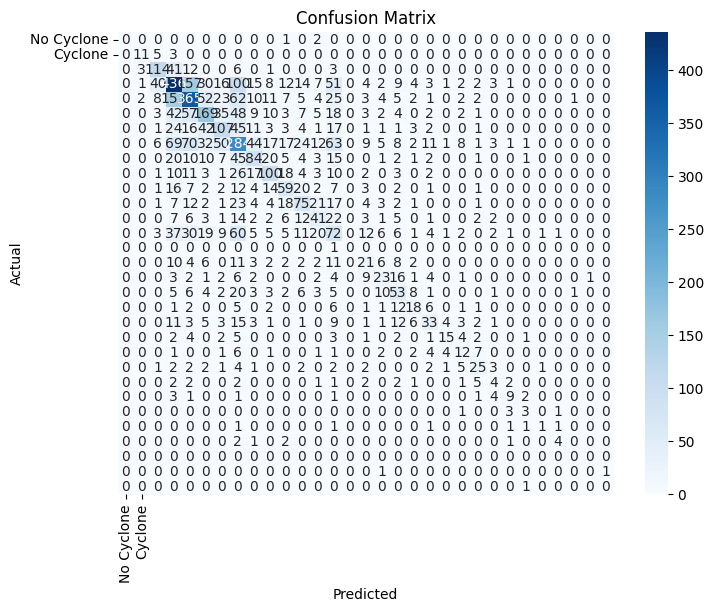

ValueError: All arrays must be of the same length

<Figure size 800x600 with 0 Axes>

In [38]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Cyclone', 'Cyclone'], 
            yticklabels=['No Cyclone', 'Cyclone'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()